In [5]:
# packages: random
import random

# packages: data structure
import numpy as np
import pandas as pd
import astropy.io as io

# packages: skimage
from skimage.draw import line, polygon, circle, circle_perimeter,\
                          ellipse, ellipse_perimeter, bezier_curve

# packages: image generation and plot generation
from matplotlib import pyplot as plt

In [ ]:
# pandas
# https://pandas.pydata.org/pandas-docs/stable/tutorials.html
# https://pandas.pydata.org/pandas-docs/stable/10min.html

# ascii:io
# http://docs.astropy.org/en/stable/io/ascii/

# matplotlib
# https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html

# skimage
# http://scikit-image.org/docs/dev/auto_examples/edges/plot_shapes.html#sphx-glr-auto-examples-edges-plot-shapes-py

In [3]:
# numpy: empty canvas
def empty_canvas(image_side_length=100):

    return np.indices((image_side_length, image_side_length))
     
    
# scikit learn: circle
def circle(canvas, x_center=50, y_center=50, radius=30):

    y, x = canvas
    circle = (x - x_center)**2 + (y - y_center)**2 < radius**2
    img = circle.astype(float)
    
    return img


# scikit learn: rectangle
def rect(canvas, x_center=50, y_center=50, radius=30):

    y, x = canvas
    rect = (x < x_center + radius) & (x > x_center - radius) & (y < y_center + radius) & (y > y_center - radius)
    img = rect.astype(float)
    
    return img
    
    
# plot for SPI package
def plot_spi(img):
    plt.axes()    
    plt.imshow(img)
    plt.clf()
        
        
# matplotlib pyplot
def circle_plt(x_center=0, y_center=0, radius=0.75, fc='r', show=False):

    plt.axes()

    circle = plt.Circle((x_center, y_center), radius=radius, fc=fc)
    plt.gca().add_patch(circle)
    plt.axis('scaled')
    imgplot = plt.imshow(img)
    imgplot = plt.savefig("test3.png", dpi = (200))
    #imgplot = plt.imshow()
        
    if show:
        plt.show()

# test each individual function
def test_individual():
    #circle()
    img = circle_sk()
    plot_spi(img)
    #star()
    return

# generate one image data set
def generate_dataset(nb_obj, 
                     image_side_length=100, 
                     index_start=0, 
                     shape='rect',
                     x_min=32,
                     x_max=32,
                     y_min=32,
                     y_max=32,
                     radius_min=10,
                     radius_max=10,
                     show_plot=False, 
                     verbose=False):

    # initiate image values
    fac = -1.0
    #x_center_list = np.random.uniform(0 + fac* radius_max, image_side_length + fac* radius_max, nb_obj)
    #y_center_list = np.random.uniform(0 + fac* radius_max, image_side_length + fac* radius_max, nb_obj)
    x_center_list = np.random.uniform(x_min, x_max, nb_obj)
    y_center_list = np.random.uniform(y_min, y_max, nb_obj)

    radius_list = np.random.uniform(radius_min, radius_max, nb_obj)
    print('x ranges', min(x_center_list), max(x_center_list))
    print('y ranges', min(y_center_list), max(y_center_list))
    column_names = ['ident', 'x_center', 'y_center', 'radius', 'shape']
    
    # create empty data structures
    tab_list = np.empty((nb_obj, len(column_names)))
    img_list = np.empty((nb_obj, image_side_length, image_side_length))
    
    # create empty canvas for a single image
    canvas = empty_canvas(image_side_length=image_side_length)
    
    # loop over objects
    icount = 0
    for i_obj in np.arange(nb_obj):
     
        # draw object properties from list
        x_center = x_center_list[i_obj]
        y_center = y_center_list[i_obj]        
        radius = radius_list[i_obj]
        
        # identification value
        ident = int(index_start + i_obj)
        
        # create object
        if shape == 'rect':
            img = rect_sk(canvas, x_center=x_center, y_center=y_center, radius=radius)
            shape_num = 0
        elif shape == 'circ':
            img = circle_sk(canvas, x_center=x_center, y_center=y_center, radius=radius)
            shape_num = 1            

        # add tabular data to data list structure
        tab_list[i_obj] = [ident, x_center, y_center, radius, int(shape_num)]
        
        # add image data to image list structure
        img_list[i_obj] = img

        # plot image
        if show_plot and icount <20:
            icount+=1
            plt.figure()
            plt.axes()    
            plt.imshow(img)
            
    # Data Frame: Tabular Data for Objects
    tab_list = pd.DataFrame(tab_list,columns=column_names)
    
    # verbose
    if verbose:
        print(tab_list[0:10])
        print(img_list[0:10])
    
    return tab_list, img_list


# save data
def save_data(f_data_list, f_img_list, data_list, img_list, verbose=False):

    # Pandas Data Frame for tabular data: save to file
    data_list.to_csv(f_data_list)

    # Numpy Array for image data: save to file
    np.save(f_img_list, img_list)
    
    # verbose
    if verbose:
        print(f_data_list_pd)
        print(f_img_list)
     
    return
        

# combine data sets
def combine_data(frames, data_type='tab'):  
    
    if data_type=='tab':
        data = pd.concat(frames)
    elif data_type=='img':
        data = np.concatenate(frames)
        
    return data


# randomize data    
def randomize_data(tab, img, seed=5, verbose=False):
    
    if verbose:
        print('Before:', tab)
 
    # create randomized indices
    random.seed(seed)  
    nb_tab = len(tab)
    ind_random = np.arange(nb_tab)    
    random.shuffle(ind_random)
    
    # re-order data based on randomized indices
    tab = tab.iloc[ind_random]
    img = img[ind_random]
    
    if verbose:
        print('After:', tab)

    return tab, img


# split data    
def split_data(nb_train, nb_valid, nb_test, tab, img, printcheck=0):

       
    ind_start_train = 0
    ind_end_train = ind_start_valid = ind_start_train + nb_train    
    ind_end_valid = ind_start_test = ind_start_valid + nb_valid
    ind_end_test = ind_start_test + nb_test
    
    if printcheck > 0:
        print(tab[0:printcheck])
        print(ind_start_train, ind_end_train)
        # good place for unit test
   
    # split data in train, valid, test
    tab_train = tab[ind_start_train: ind_end_train]
    img_train = img[ind_start_train: ind_end_train]

    tab_valid = tab[ind_start_valid: ind_end_valid]
    img_valid = img[ind_start_valid: ind_end_valid]

    tab_test = tab[ind_start_test: ind_end_test]
    img_test = img[ind_start_test: ind_end_test]
    
    return tab_train, tab_valid, tab_test, img_train, img_valid, img_test

x ranges 10.006670793022877 53.997868245890025
y ranges 10.012215820298476 53.995160518827696
x ranges 10.003455246206755 53.99969589009031
y ranges 10.021885568801949 53.99680971642177


/anaconda3/envs/SimplePhysicalImage/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Before:        ident   x_center   y_center     radius  shape
0        0.0  53.807942  14.882025  25.918850    0.0
1        1.0  24.342952  14.469646   5.429372    0.0
2        2.0  18.198739  35.984471  15.042305    0.0
3        3.0  22.387154  38.343779  13.183867    0.0
4        4.0  36.788960  34.660622  11.280092    0.0
5        5.0  46.120199  37.327714  14.005038    0.0
6        6.0  12.225752  16.334552  25.574700    0.0
7        7.0  14.348829  47.392402   6.889213    0.0
8        8.0  47.575099  30.028321  16.538826    0.0
9        9.0  38.642397  18.855977  25.582719    0.0
10      10.0  28.898036  31.055267  18.054302    0.0
11      11.0  33.795816  53.461817  27.287078    0.0
12      12.0  30.561144  41.484994   8.953349    0.0
13      13.0  48.321409  46.195169   6.232920    0.0
14      14.0  19.113632  47.170905  26.610064    0.0
15      15.0  38.380544  49.666704  23.372532    0.0
16      16.0  30.924125  22.461703  25.493766    0.0
17      17.0  46.604287  27.557403  10

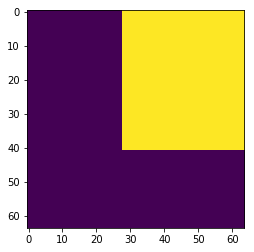

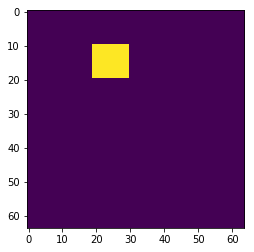

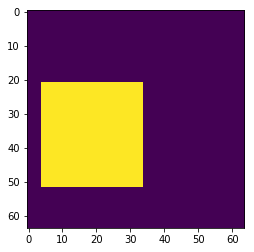

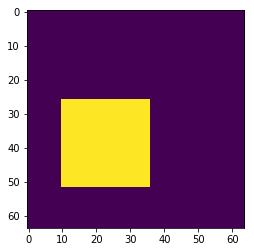

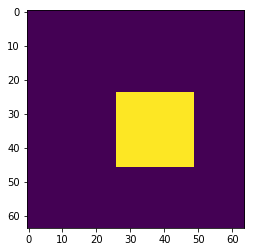

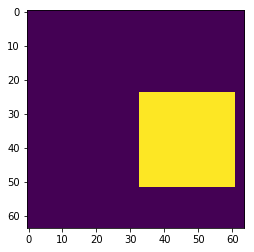

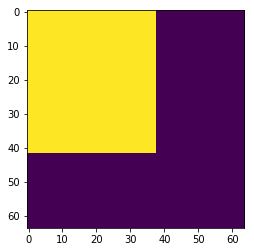

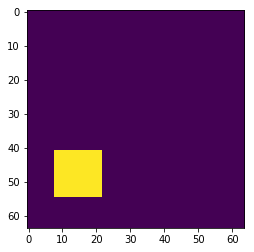

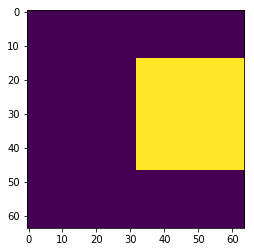

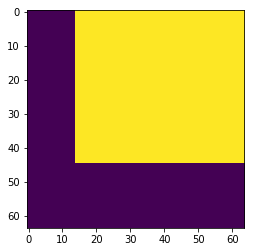

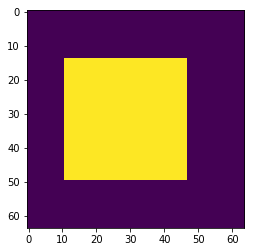

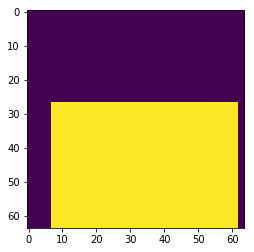

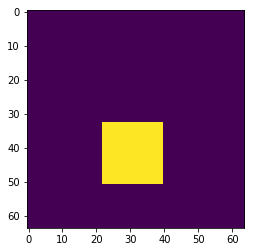

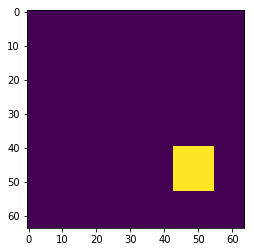

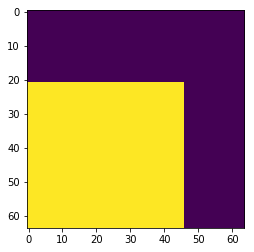

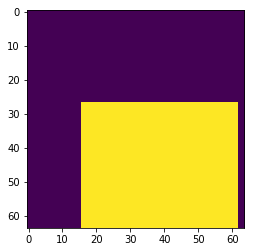

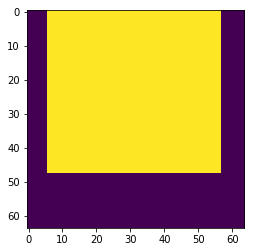

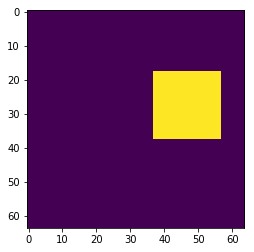

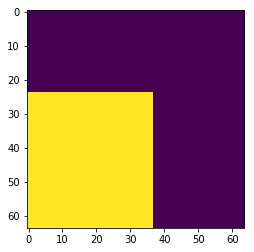

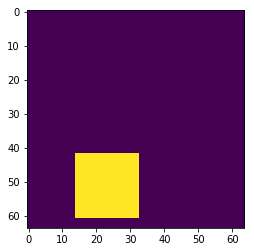

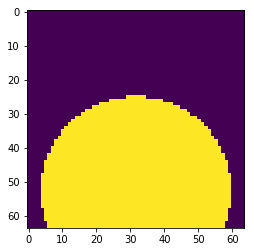

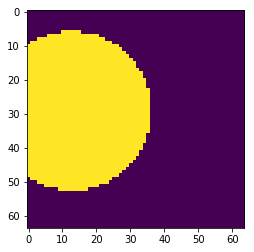

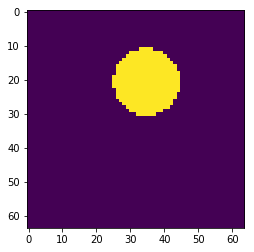

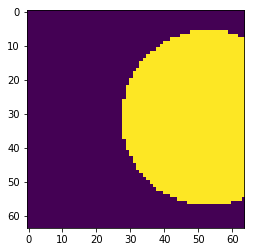

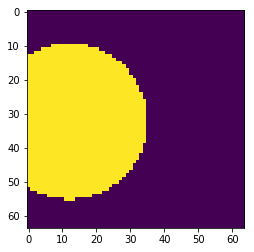

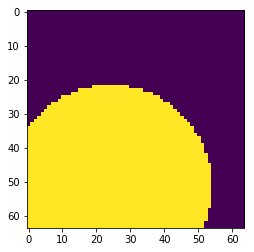

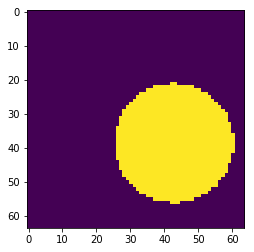

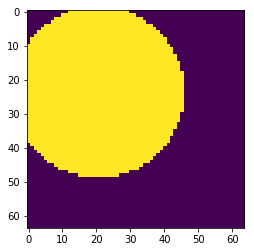

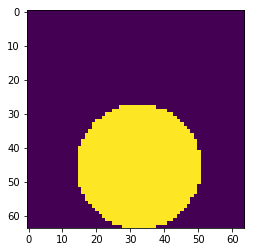

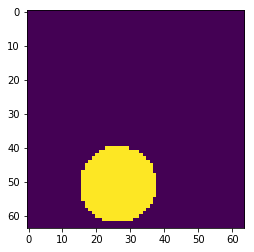

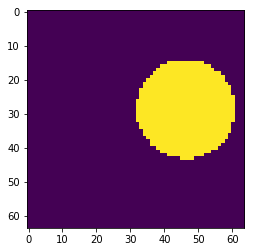

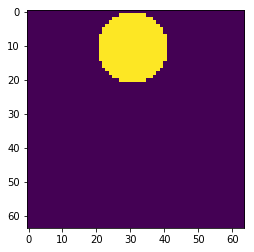

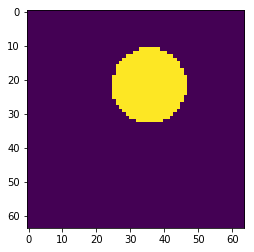

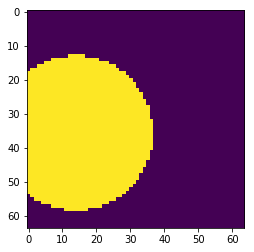

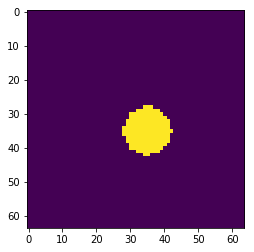

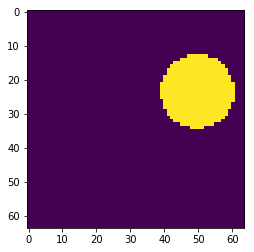

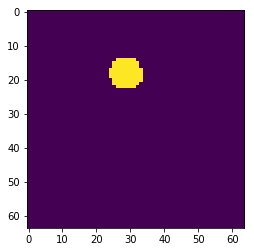

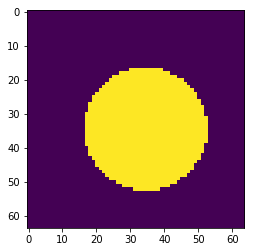

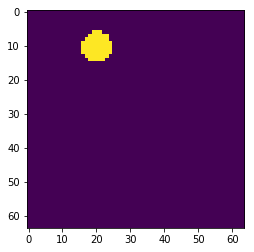

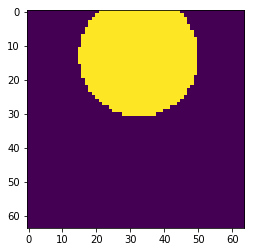

In [13]:
# Generate Data Parameters
nb_obj = 5000
#seed = 47283
image_side_length = 64
x_min, x_max = 10, 54
y_min, y_max = 10, 54
radius_min, radius_max = 4,30
show_plot = True

# Generate Data
tab_a, img_a = generate_dataset(nb_obj, image_side_length=image_side_length, radius_min=radius_min, radius_max=radius_max, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max, shape='rect', show_plot=show_plot)
tab_b, img_b = generate_dataset(nb_obj, image_side_length=image_side_length, radius_min=radius_min, radius_max=radius_max, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max, shape='circ', show_plot=show_plot, index_start=nb_obj)

# combine data
tab = combine_data([tab_a, tab_b])
img = combine_data([img_a, img_b], data_type='img')

# randomize data
tab, img = randomize_data(tab, img, verbose=True)
print('range', np.min(img), np.max(img))

# save data
f_tab = 'test_generate_pipeline_circle_data.csv'
f_img = 'test_generate_pipeline_circle_image.npy'
save_data(f_tab, f_img, tab, img, verbose=False )


# Example: read data file and prepare data for network

In [14]:
# read data from file
data_list = pd.read_csv(f_tab)
img_list = np.load(f_img)
print('range', np.min(img), np.max(img))

range 0.0 1.0


In [15]:
# Training parameters
batch_size = 20
num_classes = 2
epochs = 5
train_me = True

nb_train = 1000
nb_valid = 100
nb_test = 1000

img_rows = img_cols = img_list.shape[1]

In [16]:
# Prepare data

# ... split data
output = split_data(nb_train, nb_valid, nb_test, tab, img, printcheck=0)
y_train_temp, y_valid_temp, y_test_temp, x_train, x_valid, x_test = output
print(np.min(x_train), np.max(x_train))


# ... identify value to train on
y_train = y_train_temp['shape'].values
y_valid = y_valid_temp['shape'].values
y_test = y_test_temp['shape'].values


print("X train, valid, test shapes:", "\n", x_train.shape,"\n", x_valid.shape,"\n", x_test.shape)
print("y train, valid, test shapes:", "\n", y_train.shape,"\n", y_valid.shape,"\n", y_test.shape)

0.0 1.0
X train, valid, test shapes: 
 (1000, 64, 64) 
 (100, 64, 64) 
 (1000, 64, 64)
y train, valid, test shapes: 
 (1000,) 
 (100,) 
 (1000,)


In [17]:
''' MY DATA
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_valid = x_valid.reshape(x_valid.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
print('range', np.min(x_train), np.max(x_train))


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



range 0.0 1.0
x_train shape: (1000, 64, 64, 1)
1000 train samples
100 valid samples
1000 test samples


In [18]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
if train_me:
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_valid, y_valid))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])


Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7142 - acc: 0.5270 - val_loss: 0.6753 - val_acc: 0.5100
Epoch 2/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6608 - acc: 0.6060 - val_loss: 0.6310 - val_acc: 0.6700
Epoch 3/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5702 - acc: 0.7430 - val_loss: 0.5467 - val_acc: 0.7800
Epoch 4/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3856 - acc: 0.8790 - val_loss: 0.3321 - val_acc: 0.9300
Epoch 5/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1981 - acc: 0.9510 - val_loss: 0.2033 - val_acc: 0.9300
Test loss: 0.19812715935707093
Test accuracy: 0.931


In [ ]:
a = np.array([1.])
b = a.astype('float32')
print(a, b)

In [19]:
import PIL.ImageDraw as ImageDraw,PIL.Image as Image, PIL.ImageShow as ImageShow 
im = Image.new("RGB", (400,300))
draw = ImageDraw.Draw(im)

draw.arc((100,100,300,200),0,270,fill=255)

im.show()